# Python for Finance
## Exercises

In order to master the material of this module, do the following:

* replace the symbols used by other symbols and/or add more symbols
* work with different time horizons for the input data
* write Python code to find the minimum variance portfolio
* write Python code to find the portfolio compositions that make up the efficient frontier
* write Python code to determine the capital market line given a risk-free asset

In [26]:
import numpy as np  # array operations
import pandas as pd  # time series management
import matplotlib.pyplot as plt  # standard plotting library
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

## Retrieving Stock Price Data

Let´s implement **Markowitz Mean-Variance Portfolio Theoy (MVP)**.

We build a portfolio of **tech companies**.

In [4]:
symbols = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'INTC.O']  # our symbols
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = data[symbols]
data.tail()

,AAPL.O,MSFT.O,AMZN.O,INTC.O
Date,,,,
2018-06-25,182.17,98.39,1663.15,50.71
2018-06-26,184.43,99.08,1691.09,49.67
2018-06-27,184.16,97.54,1660.51,48.76
2018-06-28,185.50,98.63,1701.45,49.25
2018-06-29,185.11,98.61,1699.80,49.71


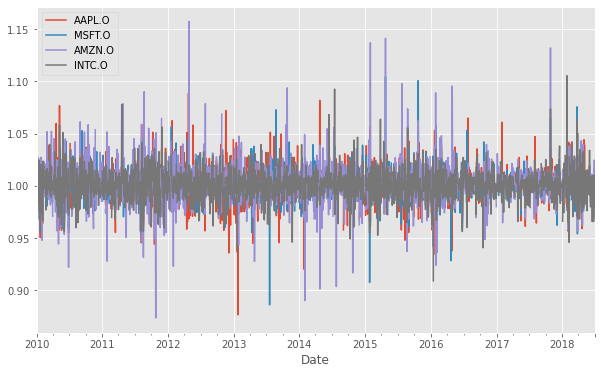

In [7]:
(data / data.shift(1) ).plot(figsize=(10, 6));

## Portfolio Returns
Calculation of the **annualized returns** of the different stocks based on the log returns for the respective time series.

In [8]:
# vectorized calculation of the log returns
log_rets = np.log(data / data.shift(1))

In [9]:
# annualized average log returns
rets = log_rets.mean() * 252
rets

AAPL.O    0.181303
MSFT.O    0.124840
AMZN.O    0.287547
INTC.O    0.096655
dtype: float64

**Starting with Equal weights**

In [10]:
weights = np.array(len(symbols) * [1 / len(symbols)])  # equal weightings
weights

array([0.25, 0.25, 0.25, 0.25])

In mathematical terms, the portfolio return is given as

\begin{eqnarray*}
\mu_p &=& \mathbf{E} \left( \sum_I w_i r_i \right) \\
        &=& \sum_I w_i \mathbf{E}\left( r_i \right) \\
        &=& \sum_I w_i \mu_i \\
        &=& w^T \mu
\end{eqnarray*}

where the $w_i$ are the weights for the single portfolio components and the $r_i$ are the respective returns.

In [11]:
print("Expected portfolio return")
np.dot(weights, rets)  # portfolio return (equal weights)

Expected portfolio return


0.17258602320245853

Calculation of the **portfolio variance** 

**Covariance Matrix**

\begin{eqnarray*}
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

Here, we have the variances of the single stocks on the diagonal and the covariances between two stocks in the other places.

In [12]:
log_rets.cov() * 252  # annualized covariance matrix

,AAPL.O,MSFT.O,AMZN.O,INTC.O
AAPL.O,0.064034,0.023656,0.027072,0.023635
MSFT.O,0.023656,0.051211,0.030382,0.030288
AMZN.O,0.027072,0.030382,0.095836,0.024999
INTC.O,0.023635,0.030288,0.024999,0.056395


### Portfolio Variance

\begin{eqnarray*}
\sigma_p^2 &=& \mathbf{E}\left( (r - \mu)^2 \right) \\
        &=& \sum_{i \in I}\sum_{j \in I} w_i w_j \sigma_{ij} \\
        &=& w^T \Sigma w
\end{eqnarray*}

In [13]:
# portfolio variance
pvar = np.dot(weights.T, np.dot(log_rets.cov() * 252, weights))
pvar

0.0367211840722477

### Portfolio Volatility

In [14]:
pvol = pvar ** 0.5
pvol

0.19162772260883262

## Random Portfolio Compositions
Next, let us generate a **random portfolio composition** and calculate the resulting portfolio return and variance.

In [16]:
weights = np.random.random(len(symbols))  # random numbers
weights /= np.sum(weights)  # normalization to 1
weights


array([0.34536438, 0.36164109, 0.0956306 , 0.19736393])

In [19]:
print("Expected Return")
np.dot(weights, rets)  # portfolio return (random weights)

Expected Return


0.15433707626583637

In [21]:
# portfolio variance (random weights)
print("Expected Annualized Variance")
np.dot(weights.T, np.dot(log_rets.cov() * 252, weights))

Expected Annualized Variance


0.03569666060663232

### Implement a **Monte Carlo simulation** for the portfolio weights and collect the resulting portfolio returns and volatilities.

In [24]:
%%time
prets = []
pvols = []
for p in range(5000):
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)
    prets.append(np.sum(log_rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(log_rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)
portfolio = pd.DataFrame({'return': prets, 'volatility': pvols})

Wall time: 7.44 s


## Visualization.

We can easily spot the area of the **minimum variance portfolio** and also see the **efficient frontier** quite well.

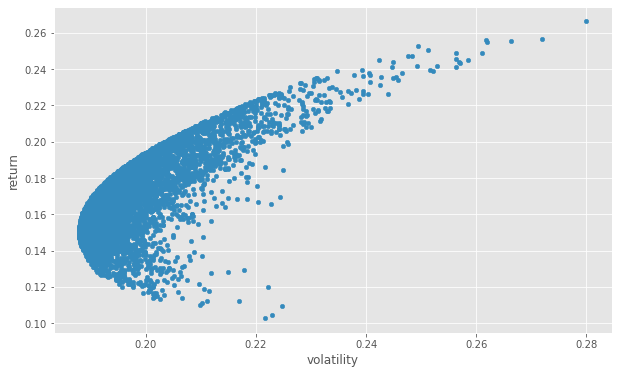

In [25]:
portfolio.plot(x='volatility', y='return', kind='scatter', figsize=(10, 6));